<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 19). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



In [2]:
%run "Electrophysiology_Source_Code.ipynb"

# <font color="gray"> Reading Material

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](Spike_Raster_Control.mat) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/braingeneers/analysis) from that package.

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

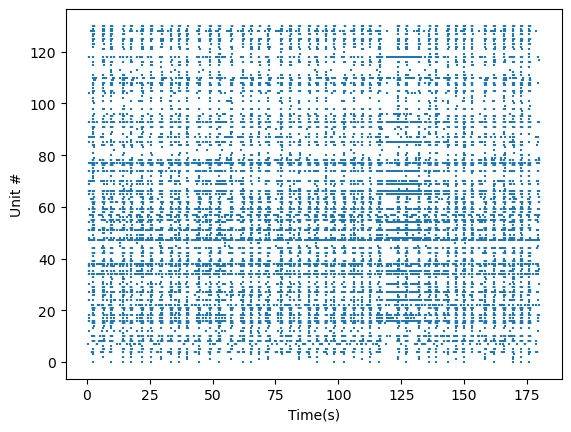

In [54]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

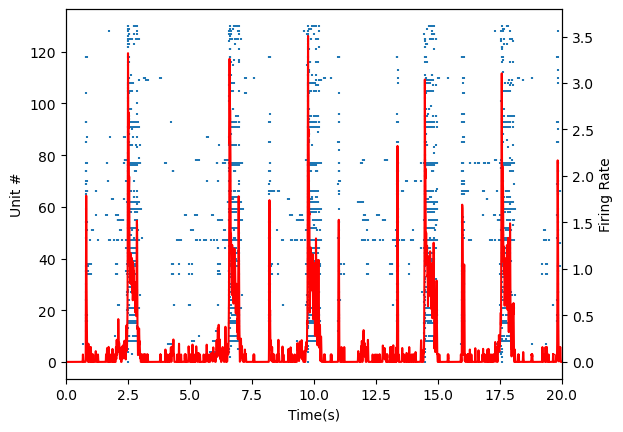

In [3]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](data/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

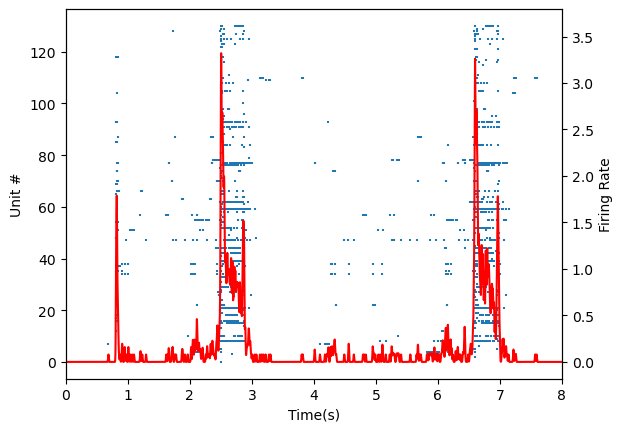

In [4]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

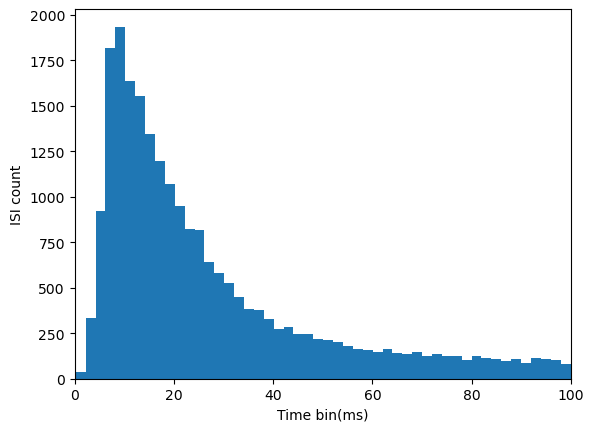

In [5]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

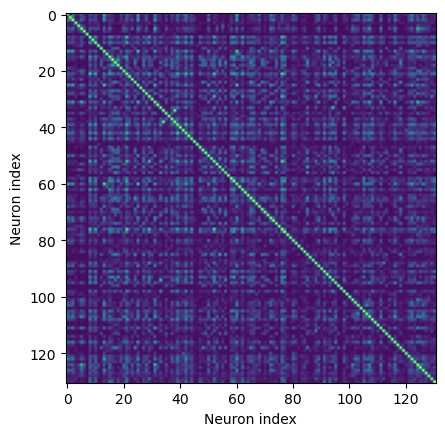

In [6]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.bumc.bu.edu/public-health-learning-modules/files/2021/04/Four-correlations.png)



# <font color="red">Exercises

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper <font color="purple"> - 5 points

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device <font color="purple"> - 3 points

What newly developed device has enabled high-resolution readouts of neural activity <font color="purple">(1 point)</font>? What is the name of the specific device (model/maker) used in this paper <font color="purple">(1 point)</font>? How many electrodes can it record from simultaneously <font color="purple">(1 point)</font>?

<font color="green"><b>Answer

CMOS, high density, multi-electrode array (MEA). MaxOne Maxwell Biosystems. 1024 simultaneously (~26400 = partial credit)

### Organoid Models  <font color="purple"> - 2 points

How long was neural activity recorded for after the cerebral organoid was placed on the recording device  <font color="purple">(1 point)</font>? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment <font color="purple">(1 point)</font>?

<font color="green"><b>Answer

<font color="purple"> When grading, if someone writes a drug name u haven't seen, check to see if it's in the paper.

 up to 6 months, 3 or 6 minutes or any number in paper (partial 25 percent). Diazepam NBQX, R-CPP, GABAA (gabazine), or any other drug listed in the paper.

## Curating Raw Data  <font color="purple"> - 2 points

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<font color="purple">half point for each correct answer

<b>Image 1:real</b> 

<b>Image 2: noise</b>

<b>Image 3: real</b>

<b>Image 4: noise</b>

<b><center>Image 1</center></b>
![alt text](data/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](data/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](data/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](data/spike4.png "Title")

## Analyzing Control Dataset <font color="purple"> - 5 points

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/tree/master/braingeneers/analysis) from the braingeneerspy python library.

### Basic Summary <font color="purple"> - 3 points

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording  <font color="purple">(1 point)</font>? How long is the recording (in seconds) <font color="purple">(1 point)</font>? In total, how many spikes occured across all neurons <font color="purple">(1 point)</font>?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer: 131 neurons, length = 179 seconds, 31756 spikes

In [3]:
print("Length (duration): " + str(data_control.length/1000) + " seconds")
##len(data_control.train)
print("Num Neurons: " + str(len(data_control.rates())))
print("Times Fired: " + str(sum(sum(data_control.raster(bin_size=1)))))


Length (duration): 179.8797 seconds
Num Neurons: 131
Times Fired: 31756


### Calculate Firing rate <font color="purple"> - 1 point

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer 1.347 spikes per second per neuron

In [10]:
sum(sum(data_control.raster(bin_size=1))) / (data_control.length / 1000) / len(data_control.rates())


31756


In [14]:
spike_tot = 0
for train in  data_control.train:
    spike_tot += len(train)
spike_tot/len(data_control.train)/data_control.length*1000

1.3476351902991721

### Calculate Coefficient of Variation <font color="purple"> - 1 point

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer cv = 0.8288942461758334

In [80]:
##data_control.interspike_intervals()
##interspike(data_control)
isis_raw = data_control.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
isis=[]
for i in range(len(isis_raw)):   
    isi=isis_raw[i]
    isis = isis + isi[isi<100].tolist()
cv = np.std(isis) / np.mean(isis)
print(cv)

0.8288942461758334


## Analyzing Diazepam Dataset  <font color="purple"> -  11.5 

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data  <font color="purple"> - 1 points

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer

In [5]:
data_diazepam = mat_to_spikeData("data/Spike_Raster_Diazepam.mat")


### Basic Summary <font color="purple"> - 3 points

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer Neurons: 131, Lengt: 3 min, Times Fired: 20971

In [6]:
print("Length (duration): " + str(data_diazepam.length/1000) + " seconds")
##len(data_control.train)
print("Num Neurons: " + str(len(data_diazepam.rates())))
print("Times Fired: " + str(sum(sum(data_diazepam.raster(bin_size=1)))))

Length (duration): 179.9898 seconds
Num Neurons: 131
Times Fired: 20971


### Firing Rate  <font color="purple"> - 1 points

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer 0.8894 spikes per second per neuron. This is consistent with what we expect from Diazepam because diazepam is supposed to decrease the firing rate in neurons.

In [12]:
sum(sum(data_diazepam.raster(bin_size=1))) / (data_diazepam.length / 1000) / len(data_diazepam.rates())

0.8894057855814543

In [11]:
spike_tot = 0
for train in  data_diazepam.train:
    spike_tot += len(train)
spike_tot/len(data_diazepam.train)/data_diazepam.length*1000

0.8894057855814546

### Calculate Coefficient of Variation   <font color="purple"> - 1 points

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer The CV for the diazepam dataset is 0.59993, compared to the data_control which is 0.8894. Since a lower CV indicates less randomness, this is expected to come from the effects of Diazepam.

In [95]:
##data_control.interspike_intervals()
##interspike(data_control)
isis_raw = data_diazepam.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
isis=[]
for i in range(len(isis_raw)):   
    isi=isis_raw[i]
    isis = isis + isi[isi<100].tolist()
cv = np.std(isis) / np.mean(isis)
print(cv)

0.5999328469175627


### Bursting Behaviour  <font color="purple"> - 4 points

#### Macro <font color="purple"> - 2.5 points

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording <font color="purple">(.5 point)</font>. How many bursts do you see<font color="purple">(.5 point)</font>? How does this compare to the number of bursts you saw in the control dataset <font color="purple">(.5 point)</font>? Are these results consistent with figures in Tal's paper <font color="purple">(.5 point)</font>? If so, which figure <font color="purple">(.5 point)</font>?

<font color="green"><b>Answer There are 8 burts in the first 20 seconds of the Diazepam dataset. This is greater than the data_control which only had 5 bursts in the first 20 seconds. The results are consistent in Tal's paper which can be seen in Figure 1 D

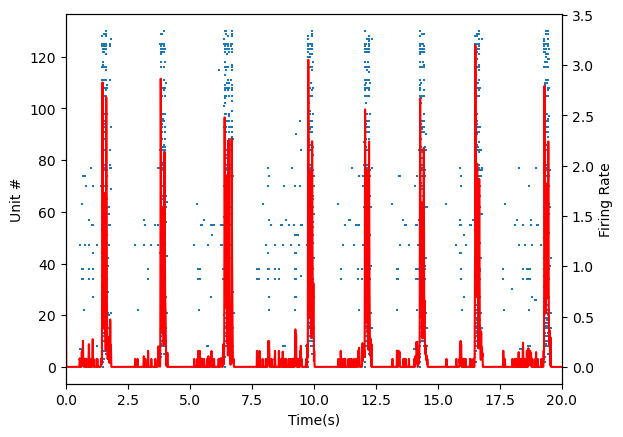

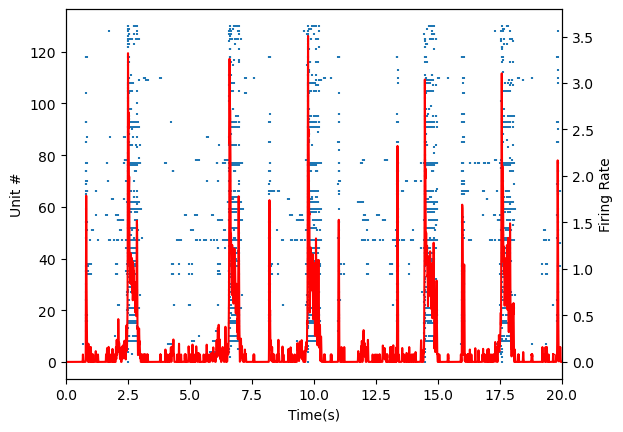

In [99]:
raster_analysis(data_diazepam)
raster_analysis(data_control)

#### Micro <font color="purple"> - 1.5 points

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset <font color="purple">(.5 point)</font>. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different <font color="purple">(.5 point)</font>? If so how <font color="purple">(.5 point)</font>?

<font color="green"><b>Answer The neural activity patterns looks different between the Diazepam and Control dataset. The burst duration is shorter in the Diazepam dataset compared to the control. Also, inbetween the first and last big spikes in the bursts, the length between the highs and lows is greater in the diazepam dataset.

diazepam


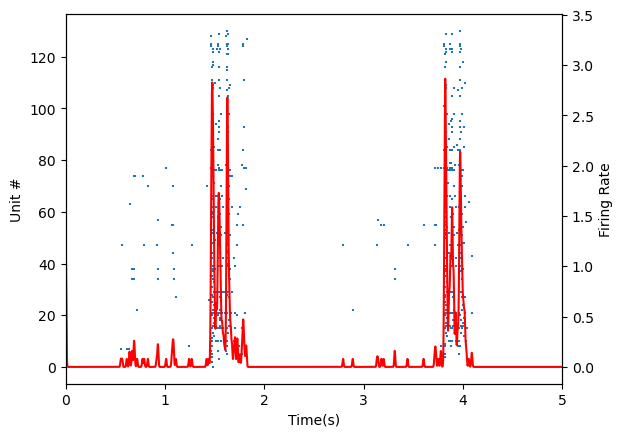

control


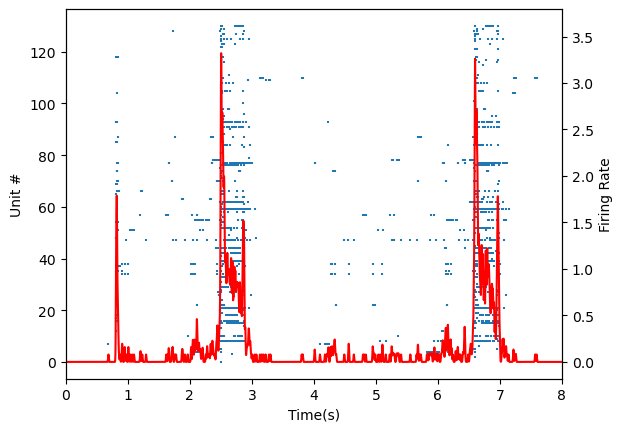

In [15]:
print("diazepam")
raster_analysis(data_diazepam, 5)
print("control")
raster_analysis(data_control, 8)

### Replicate Correlation and ISI <font color="purple"> - 1.5 points

Plot the correlation matrix  <font color="purple">(.5 point)</font> and the ISI histogram  <font color="purple">(.5 point)</font> for the diazepam dataset. Briefly compare these plots to those from the control dataset  <font color="purple">(.5 point)</font>.

<font color="green"><b>Answer The correlation matrix between the diazepam dataset and control are different. The diazepam correlation matrix has more green than the control's. The ISI for the control follows something similar to a poisson distribution, whereas the ISI for the diazepam dataset is more evenly distributed, with 3 "peaks" at different locations.

Diazepam


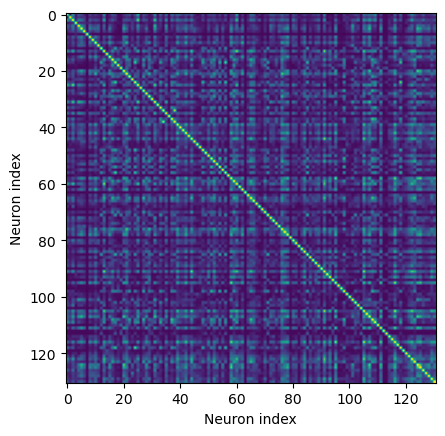

Control


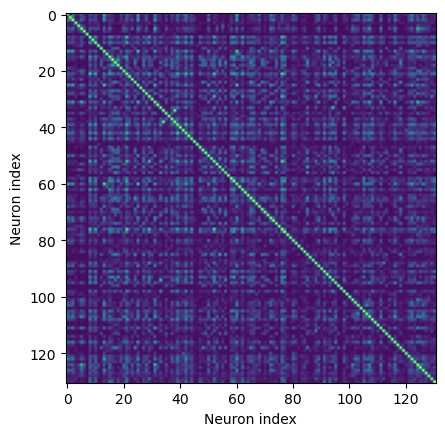

Diazepam


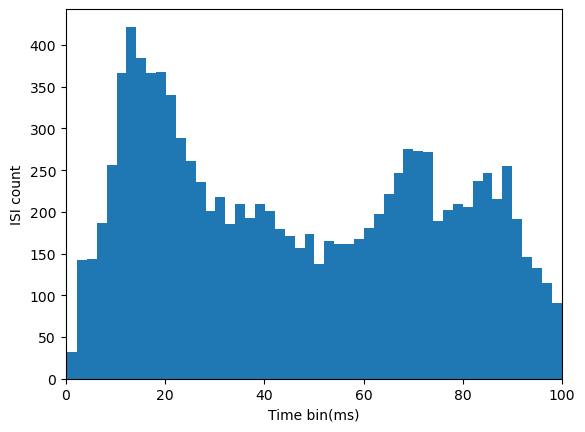

Control


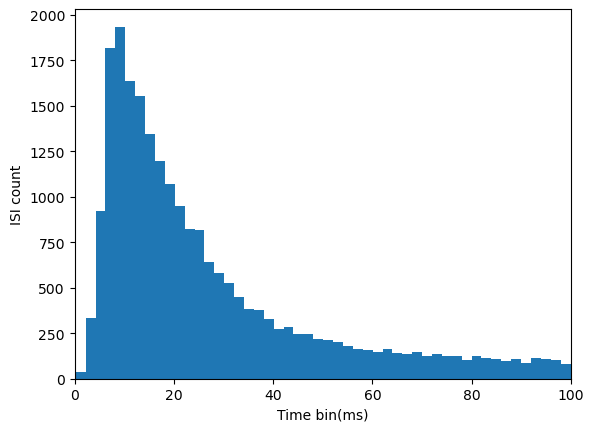

In [111]:
print("Diazepam")
correlation(data_diazepam)
print("Control")
correlation(data_control)
print("Diazepam")
interspike(data_diazepam)
print("Control")
interspike(data_control)

## Correlation & Spike Time Tilling <font color="purple"> - 9.5 points

### Correlation Matrix Equation <font color="darkREad"> -  2 points

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer- Ask elliott for other formats of answer

![alt text](correlation_matrix.png "Title")

### Diagonal of Correlation Matrix <font color="purple"> -  1 points

What are the values on the diagonal of the correlation matrix <font color="purple">(.5 point)</font>? Why<font color="purple">(.5 point)</font>?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer All values on the diagonal of the correlation matrix are 1 because along the diagonal the currRow = currCol, meaning it is the correlation between the same neuron.

### Why STTC? <font color="darkREad"> - 1.5 point

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer- Ask elliott for answer

### Plot STTC <font color="purple"> -  2 points

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer

Diazepam


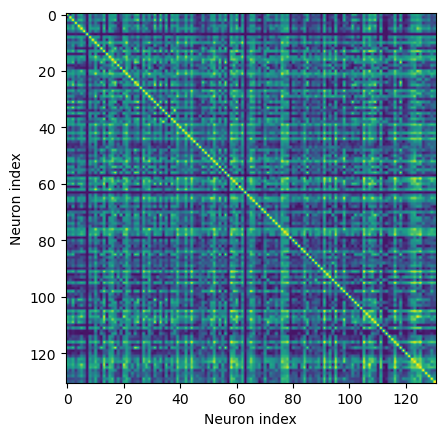

Control


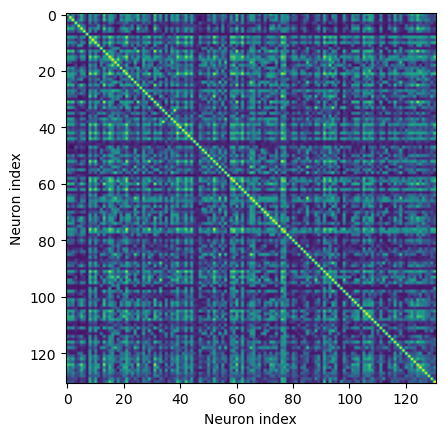

In [17]:
print("Diazepam")
plt.imshow(data_diazepam.spike_time_tilings())
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show()
print("Control")
plt.imshow(data_control.spike_time_tilings())
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show() 

### Compare Plots <font color="purple">- 1.5 points

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam  <font color="purple">(.5 point)</font>? Explain <font color="purple">(.5 point)</font>. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets  <font color="purple">(.5 point)</font>?

<font color="green"><b>Answer The variation of the two plots makes sense based on our current understanding of Diazepam. Diazepam is understood to make neuron firing less random, which is why the Diazepam dataset's correlation plot shows a higher correlation between the neurons. More organized essentially

This is consistent with the variation between the correlation coefficient matrices of the two datasets, however using the spike time tiling coefficient, the differences between the two datasets is much more noticeable.
    


### Diagonal of STTC <font color="darkREad">- 1.5 points

<font color="purple">1 point for gettign value correct. .5 point for explanation

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer The diagonals of the STTC equal 1. Ask elliott for explanation
    
If they say 1, 75 percent credit
    

# <font color="purple"> Grading Summary

In total, this homework is worth 33 points. Elliot is grading <font color="darkRead">5 points</font>. Brandon is grading <font color="purple"> 28 points</font>